1. Cross-validation, also known as K-folds is a sampling method to evaluate sample datas, using K as the number of groups created

2. Advantages: More accurate estimation of out of sample accuracy and more efficient use of data as the observations are used for both training and testing
   Disadvantages: We perform training on 50% of the dataset and we might leave out the important things in the other 50%

3. GAMs are linear models dependent on unknown smooth functions or some other predictor variables

4. A decision tree method uses a tree-like graph to separate the possible outcomes, while other classification methods do not, they use scatter plots and linear data

5. Classification methods: besides decision tree, rule-based, neural networks, support vector machines, naive bayes
   Decision tree method looks like a tree with branching paths, you ask a question and based on the answer determines the next question asked, there are multiple branching paths per node

6. Advantages of decision trees include forcing consideration of all possible outcomes of a decision to its conclusion, creates analysis of the consequences of each branch and finds nodes that need further analysis
   Disadvantages of decison trees is that they are unstable, any change in the data can change the whole tree, and decision trees are inaccurate 

7. Subset selection method: wrappers, filters, embedded
   Cross validation involves having a K value while subset selection does not, subset selection also searches based on the features, ex. cross validation will split the data into groups based on the number of K, while subset selection will split the data based on the features

In [1]:
#Question 7
import pandas as pd
from pydataset import data
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
insurance = pd.read_csv('insurance_data.csv')
insurance.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
x_train, x_test, y_train, y_test = train_test_split(insurance.drop('bought_insurance', axis = 1), insurance['bought_insurance'])

In [4]:
LogReg = LogisticRegression(solver = 'lbfgs')
LogReg.fit(x_train, y_train)
#LogReg.fit(x_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
LogReg.predict(np.array([[45]]))[0]

1

In [6]:
#Question 8
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz, DecisionTreeClassifier
%matplotlib inline

In [7]:
data = pd.read_csv('data.csv')
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,Mask Off,Future,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,Redbone,Childish Gambino,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,Xanny Family,Future,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,Master Of None,Beach House,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,Parallel Lines,Junior Boys,1


In [8]:
newData = data.drop({'song_title', 'artist'},axis = 1)
#took out song titles and artist names because it is irrelevent 

In [9]:
newData.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1


In [10]:
x_train, x_test, y_train, y_test = train_test_split(newData.drop('target', axis = 1), newData['target'])

In [11]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
#the training data comment and uncomment the test to check out test
#clf = clf.fit(x_test, y_test) 
#the test data comment and uncomment the train to check out train
feature = newData[{'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'}]
#features = feature.columns
#features

In [12]:
target = newData['target']

In [13]:
accTrain = np.sum(clf.predict(x_train)  == y_train)/float(y_train.size)
accTest = np.sum(clf.predict(x_test)  == y_test)/float(y_test.size)

In [14]:
accTrain

0.9986772486772487

In [15]:
accTest

0.689108910891089

[Text(171.7294921875, 211.4, 'X[4] <= 0.0\nentropy = 0.5\nsamples = 1512\nvalue = [736, 776]'),
 Text(116.42203124999999, 199.32, 'X[9] <= 0.124\nentropy = 0.471\nsamples = 773\nvalue = [480, 293]'),
 Text(67.7840625, 187.24, 'X[1] <= 0.713\nentropy = 0.397\nsamples = 572\nvalue = [416, 156]'),
 Text(30.088124999999998, 175.16, 'X[2] <= 163780.0\nentropy = 0.343\nsamples = 418\nvalue = [326, 92]'),
 Text(7.199999999999999, 163.07999999999998, 'X[1] <= 0.562\nentropy = 0.48\nsamples = 25\nvalue = [10, 15]'),
 Text(2.88, 151.0, 'X[2] <= 60950.0\nentropy = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(1.44, 138.92000000000002, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(4.32, 138.92000000000002, 'X[10] <= 141.779\nentropy = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(2.88, 126.84, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(5.76, 126.84, 'X[12] <= 0.457\nentropy = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(4.32, 114.75999999999999, 'entropy = 0.0\nsamples = 2\nvalue = 

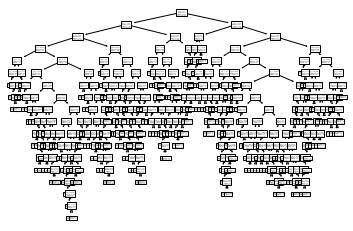

In [16]:
tree.plot_tree(clf.fit(x_train, y_train))
#the training data comment and uncomment the test to check out test
#tree.plot_tree(clf.fit(x_test, y_test))
#the test data comment and uncomment the train to check out train
#the tree is at the end of all the text

In [17]:
#results told us that based on the features of the data we will either get a 1 or 0 in the target
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

In [18]:
X = feature
y = target

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [36]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=9, random_state=9, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

Train Index:  [ 225  226  227 ... 2014 2015 2016] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224]
Train Index:  [   0  

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


 [   0    1    2 ... 2014 2015 2016] 

Test Index:  [449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466
 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484
 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502
 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520
 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538
 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556
 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574
 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592
 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610
 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628
 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646
 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664
 665 666 667 668 669 670 671 672]
Train Index:  [   0    1    2 ... 2014

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index:  [   0    1    2 ... 2014 2015 2016] 

Test Index:  [ 897  898  899  900  901  902  903  904  905  906  907  908  909  910
  911  912  913  914  915  916  917  918  919  920  921  922  923  924
  925  926  927  928  929  930  931  932  933  934  935  936  937  938
  939  940  941  942  943  944  945  946  947  948  949  950  951  952
  953  954  955  956  957  958  959  960  961  962  963  964  965  966
  967  968  969  970  971  972  973  974  975  976  977  978  979  980
  981  982  983  984  985  986  987  988  989  990  991  992  993  994
  995  996  997  998  999 1000 1001 1002 1003 1004 1005 1006 1007 1008
 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022
 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036
 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050
 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064
 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078
 1079 1080 1

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index:  [   0    1    2 ... 2014 2015 2016] 

Test Index:  [1345 1346 1347 1348 1349 1350 1351 1352 1353 1354 1355 1356 1357 1358
 1359 1360 1361 1362 1363 1364 1365 1366 1367 1368 1369 1370 1371 1372
 1373 1374 1375 1376 1377 1378 1379 1380 1381 1382 1383 1384 1385 1386
 1387 1388 1389 1390 1391 1392 1393 1394 1395 1396 1397 1398 1399 1400
 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411 1412 1413 1414
 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425 1426 1427 1428
 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439 1440 1441 1442
 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453 1454 1455 1456
 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469 1470
 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484
 1485 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498
 1499 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512
 1513 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526
 1527 1528 1

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index:  [   0    1    2 ... 1790 1791 1792] 

Test Index:  [1793 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805 1806
 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818 1819 1820
 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834
 1835 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848
 1849 1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862
 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876
 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890
 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904
 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918
 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932
 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946
 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [32]:
best_svr.fit(X_train, y_train)
scores.append(best_svr.score(X_test, y_test))

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
print(np.mean(scores))

-0.050609500026750694


In [34]:
#the number above tells the accuracy of the K-Fold

In [35]:
print(scores)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.9615805005082632, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
#above are the scores, as the data have no variation unless its in the middle, only the middle of the dataset have any change
#if chosen any data from the front or the back will cause no change, only the data in the middle of the set will change
#so the best model would be the dataset from the middle of data.csv so the dataset of (n_splits/2)+1